In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as mns
import matplotlib as mpl

warnings.filterwarnings('ignore')


In [2]:
data = pd.read_table('../附件/附件1：估价训练数据.txt', header=None)
columns = ['carId', 'tradeTime', 'brand', 'serial', 'model', 'mileage', 'color', 'cityId', 'carCode', 'tansferCount',
           'seatings', 'registerDate', 'licenseDate', 'country', 'makeType', 'modelYear', 'displacement', 'gearbox',
           'oilType', 'newPrice']
for i in range(15):
    columns.append('unknown' + str(i))
del i
columns.append('price')
data.columns = columns
data

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown6,unknown7,unknown8,unknown9,unknown10,unknown11,unknown12,unknown13,unknown14,price
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,...,NaN,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,NaN,4.24
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,NaN,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,NaN,7.38
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,NaN,4515*1725*1445,NaN,2,NaN,1.00
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,2018-08-18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,NaN,4.38
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,2020-09-20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,NaN,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,NaN,1.0,5.0,2.0,1,4295*1705*1570,NaN,1,NaN,0.88
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,2019-09-23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,NaN,8.30
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,NaN,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,NaN,5.00
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,2020-07-09,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,NaN,28.00


In [3]:
data.tail(10)

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown6,unknown7,unknown8,unknown9,unknown10,unknown11,unknown12,unknown13,unknown14,price
29990,64261,2021-06-19,18,536,11277,3.63,3,7,4.0,0,...,NaN,2.0,5.0,NaN,1+2,4717*1891*1689,201905.0,1,2082-10-21,37.20
29991,42866,2020-07-07,5,73,599,4.54,1,19,1.0,0,...,NaN,2.0,5.0,2.0,1+2,4667*1839*1660,201609.0,1,NaN,12.20
29992,24598,2021-07-06,16,443,5156,7.14,1,1,2.0,0,...,NaN,1.0,4.0,3.0,1+2,4595*1755*1475,201109.0,1,2022-07-06,4.80
29993,72533,2021-02-04,23,77,12481,6.87,1,1,2.0,1,...,2020-10-19,1.0,5.0,2.0,1+2,4725*1880*1686,201212.0,1,NaN,10.40
29994,27237,2021-04-19,44,249,403,5.79,2,1,1.0,0,...,NaN,1.0,5.0,2.0,1+2,4649*1859*1695,201511.0,1,NaN,11.80
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,NaN,1.0,5.0,2.0,1,4295*1705*1570,NaN,1,NaN,0.88
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,2019-09-23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,NaN,8.30
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,NaN,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,NaN,5.00
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,2020-07-09,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,NaN,28.00
29999,28672,2020-12-07,55,229,5838,3.92,1,13,1.0,0,...,NaN,NaN,NaN,NaN,1+2,4867*1823*1456,201803.0,2,NaN,18.80


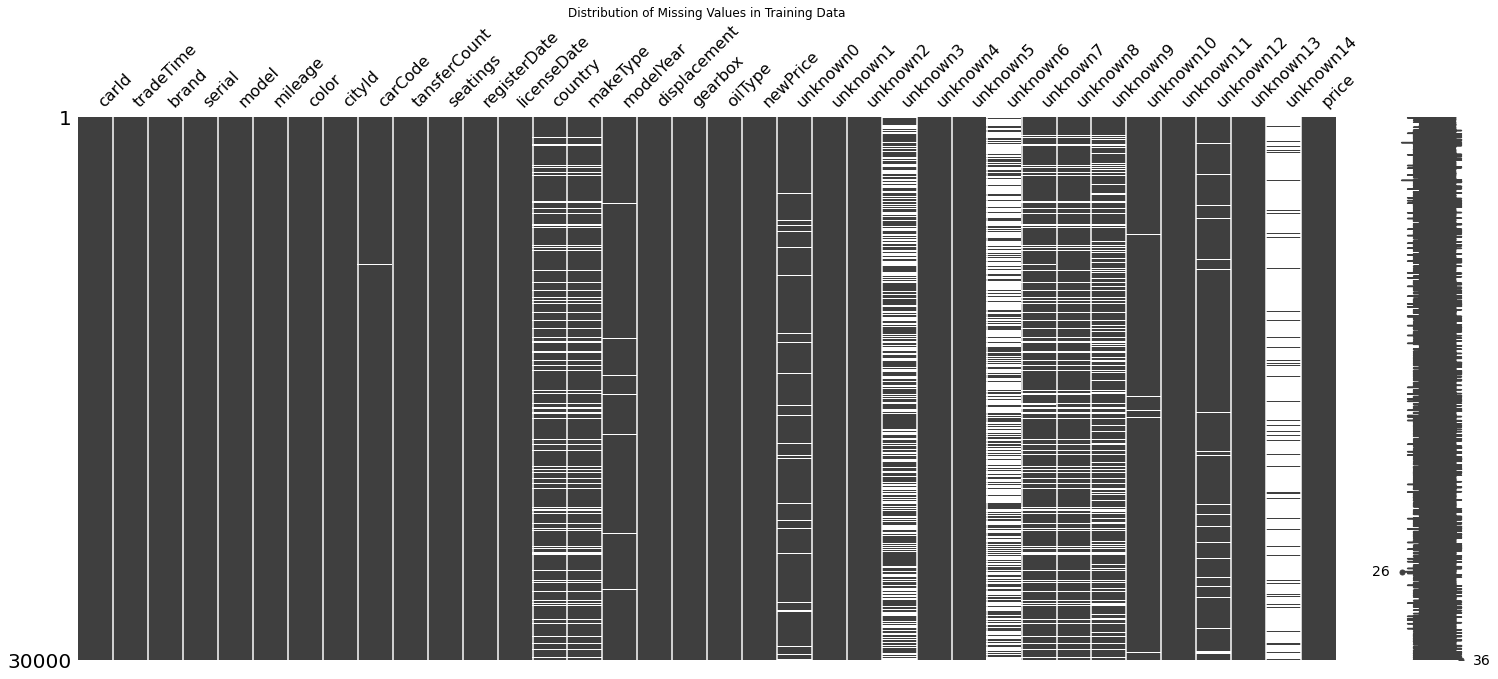

In [4]:
# 缺失值可视化
mns.matrix(data)
plt.title('Distribution of Missing Values in Training Data')
plt.savefig('./solve1/missing_matrix.png', dpi=800, bbox_inches = 'tight')

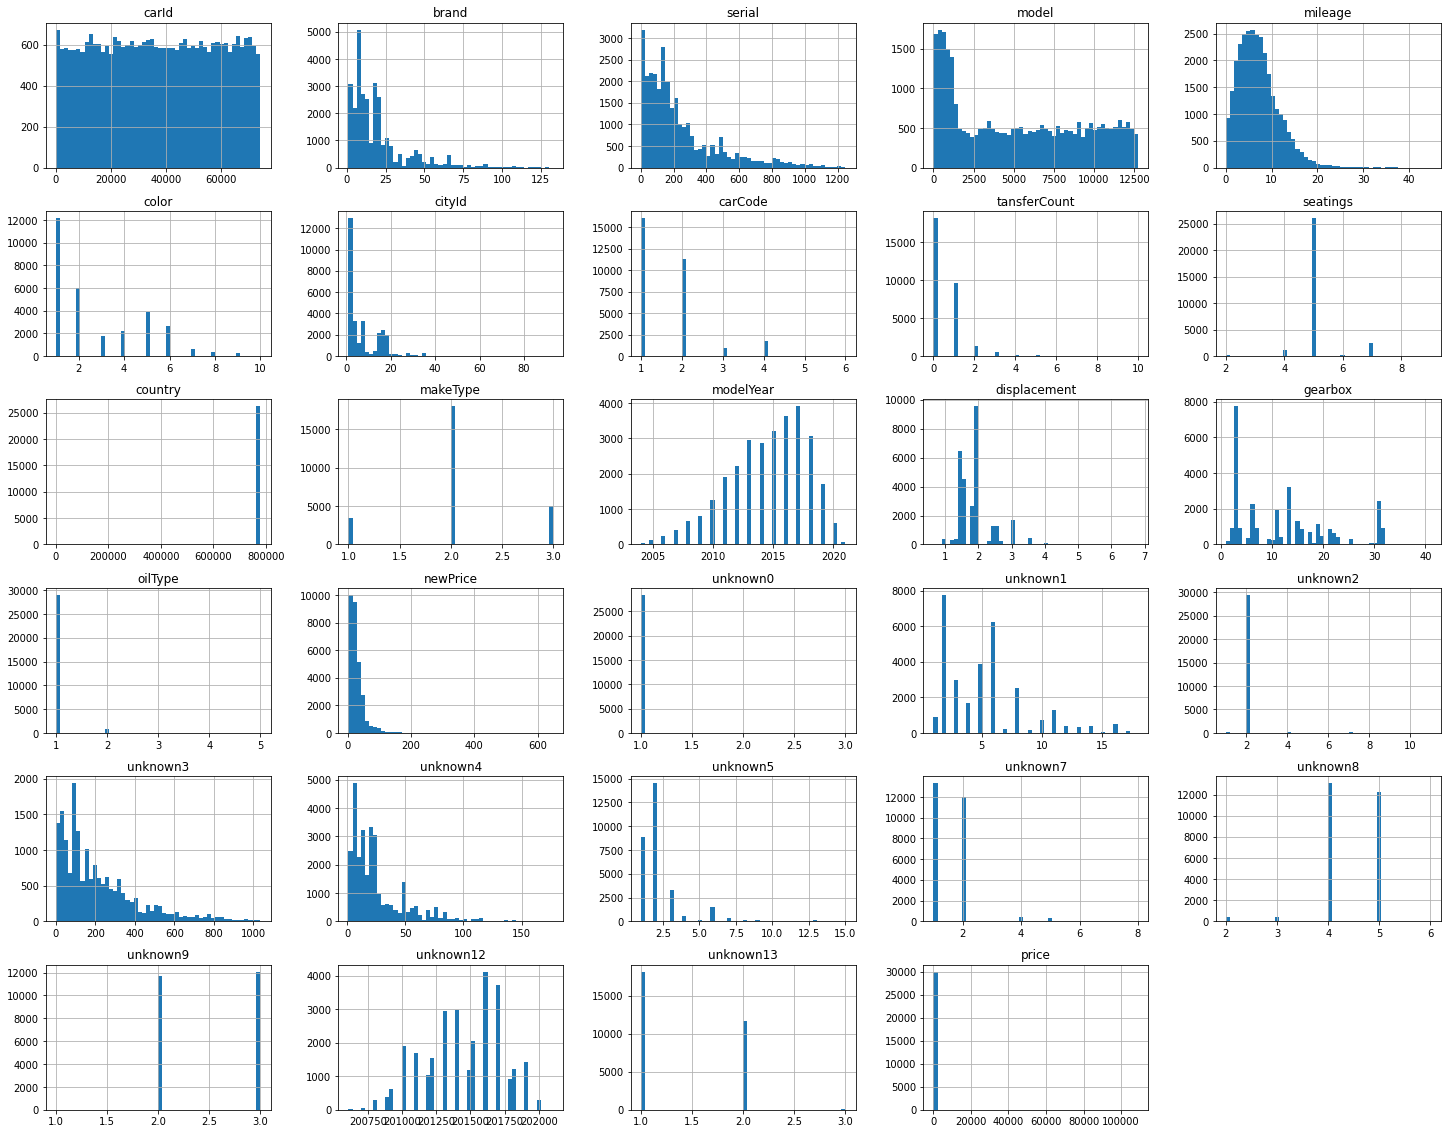

In [5]:
# 数据分布情况
data.hist(bins=50, figsize=(25, 20))
plt.cla()
plt.savefig('./solve1/hist.png', dpi=800)

In [6]:
# 特征重命名，做特征融合

for col in ['tradeTime', 'registerDate', 'licenseDate']:
    data[col] = pd.to_datetime(data[col])
    del col

"""
@:param productionTime: 注册日期与展销日期的间隔
@:param useTime:    挂牌日期与展销时间的间隔
@:param time:   此款车型出的年限
将时间型数据转化为连续的数值型数据（年限）
"""
data.rename(columns={'registerDate': 'productionTime', 'licenseDate': 'useTime', 'modelYear': 'time'}, inplace=True)

data['productionTime'] = data['tradeTime'] - data['productionTime']
data['useTime'] = data['tradeTime'] - data['useTime']
data['time'] = 2021 - data['time']

data['productionTime'] = data['productionTime'].astype(np.str)
data['useTime'] = data['useTime'].astype(np.str)

data['productionTime'] = data['productionTime'].str.split()
data['productionTime'] = [np.float(i[0])/365 for i in data['productionTime'].tolist()]
data['useTime'] = data['useTime'].str.split()
data['useTime'] = [np.float(i[0])/365 for i in data['useTime'].tolist()]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   carId           30000 non-null  int64         
 1   tradeTime       30000 non-null  datetime64[ns]
 2   brand           30000 non-null  int64         
 3   serial          30000 non-null  int64         
 4   model           30000 non-null  int64         
 5   mileage         30000 non-null  float64       
 6   color           30000 non-null  int64         
 7   cityId          30000 non-null  int64         
 8   carCode         29991 non-null  float64       
 9   tansferCount    30000 non-null  int64         
 10  seatings        30000 non-null  int64         
 11  productionTime  30000 non-null  float64       
 12  useTime         30000 non-null  float64       
 13  country         26243 non-null  float64       
 14  makeType        26359 non-null  float64       
 15  ti

In [7]:
# 推断un11 是车子尺寸，将其扩增为三个连续型特征
data['unknown11'] = data['unknown11'].str.split('*')
data['unknown11_1'] = [np.float(i[0])/1000 for i in data['unknown11'].tolist()]
data['unknown11_2'] = [np.float(i[1])/1000 for i in data['unknown11'].tolist()]
data['unknown11_3'] = [np.float(i[2])/1000 for i in data['unknown11'].tolist()]
data.drop(columns=['unknown11'], inplace=True)

In [8]:
# un12 疑似时间数据，将其转化成时间格式，以展销时间减去，得到连续的数值型数据

_ = data[data['unknown12'].notna()]
_['unknown12'] = pd.to_datetime(_['unknown12'], format='%Y%m')
_['unknown12'] = _['tradeTime'] - _['unknown12']
_['unknown12'] = _['unknown12'].astype(np.str)
_['unknown12'] = _['unknown12'].str.split()
_['unknown12'] = [np.float(i[0])/365 for i in _['unknown12'].tolist()]
data.loc[data['unknown12'].notna(), 'unknown12'] = _['unknown12']
data

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown8,unknown9,unknown10,unknown12,unknown13,unknown14,price,unknown11_1,unknown11_2,unknown11_3
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,...,5.0,2.0,1,3.824658,1,NaN,4.24,4.220,1.740,1.625
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,4.0,3.0,1+2,4.816438,2,NaN,7.38,4.630,1.775,1.480
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,2,NaN,1.00,4.515,1.725,1.445
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,5.0,2.0,1,4.912329,2,NaN,4.38,4.500,1.834,1.707
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,5.0,2.0,1,9.252055,1,NaN,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,5.0,2.0,1,NaN,1,NaN,0.88,4.295,1.705,1.570
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,4.0,3.0,1+2,8.427397,2,NaN,8.30,4.960,1.845,1.480
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,4.0,3.0,1,11.498630,2,NaN,5.00,4.665,1.700,1.510
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,4.0,3.0,3+2,5.279452,1,NaN,28.00,4.915,1.820,1.450


In [9]:
tradeTime = data['tradeTime']

In [10]:
# 时间数据无法加入到回归模型中，假设今天是2021年最后一天，以今天减去展销时间得到放在平台上拍卖的时间（连续型）
data['tradeTime'] = pd.to_datetime('2021-12-31') - data['tradeTime']
data['tradeTime'] = data['tradeTime'].astype(np.str)
data['tradeTime'] = data['tradeTime'].str.split()
data['tradeTime'] = [np.float(i[0])/365 for i in data['tradeTime'].tolist()]

data

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown8,unknown9,unknown10,unknown12,unknown13,unknown14,price,unknown11_1,unknown11_2,unknown11_3
0,1,0.509589,1,1,1,4.01,1,1,1.0,0,...,5.0,2.0,1,3.824658,1,NaN,4.24,4.220,1.740,1.625
1,2,0.517808,2,2,2,8.60,1,2,1.0,0,...,4.0,3.0,1+2,4.816438,2,NaN,7.38,4.630,1.775,1.480
2,5,0.534247,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,2,NaN,1.00,4.515,1.725,1.445
3,6,0.506849,6,6,6,6.04,1,3,1.0,3,...,5.0,2.0,1,4.912329,2,NaN,4.38,4.500,1.834,1.707
4,7,0.504110,7,7,7,5.70,4,1,2.0,2,...,5.0,2.0,1,9.252055,1,NaN,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,0.600000,34,588,4169,10.38,5,35,3.0,0,...,5.0,2.0,1,NaN,1,NaN,0.88,4.295,1.705,1.570
29996,4294,1.578082,12,92,1797,11.69,2,1,2.0,2,...,4.0,3.0,1+2,8.427397,2,NaN,8.30,4.960,1.845,1.480
29997,20584,1.260274,7,113,501,9.87,6,1,2.0,0,...,4.0,3.0,1,11.498630,2,NaN,5.00,4.665,1.700,1.510
29998,11490,1.142466,45,131,3024,9.57,1,1,1.0,1,...,4.0,3.0,3+2,5.279452,1,NaN,28.00,4.915,1.820,1.450


In [11]:
missing = (data.shape[0] - data.count()) / data.shape[0]
missing = missing[missing > 0.]
missing

carCode      0.000300
country      0.125233
makeType     0.121367
time         0.010400
gearbox      0.000033
unknown0     0.052733
unknown3     0.403600
unknown6     0.601467
unknown7     0.125833
unknown8     0.124800
unknown9     0.208033
unknown10    0.015367
unknown12    0.053967
unknown14    0.919333
dtype: float64

In [12]:
data.drop(columns=['unknown6', 'unknown14'], inplace=True, axis=1)

data = data[data['carCode'].notna()]
data = data[data['gearbox'].notna()]
missing = missing[missing > .01]
missing = missing[missing < .6]
data

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown7,unknown8,unknown9,unknown10,unknown12,unknown13,price,unknown11_1,unknown11_2,unknown11_3
0,1,0.509589,1,1,1,4.01,1,1,1.0,0,...,1.0,5.0,2.0,1,3.824658,1,4.24,4.220,1.740,1.625
1,2,0.517808,2,2,2,8.60,1,2,1.0,0,...,2.0,4.0,3.0,1+2,4.816438,2,7.38,4.630,1.775,1.480
2,5,0.534247,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,NaN,2,1.00,4.515,1.725,1.445
3,6,0.506849,6,6,6,6.04,1,3,1.0,3,...,2.0,5.0,2.0,1,4.912329,2,4.38,4.500,1.834,1.707
4,7,0.504110,7,7,7,5.70,4,1,2.0,2,...,1.0,5.0,2.0,1,9.252055,1,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,0.600000,34,588,4169,10.38,5,35,3.0,0,...,1.0,5.0,2.0,1,NaN,1,0.88,4.295,1.705,1.570
29996,4294,1.578082,12,92,1797,11.69,2,1,2.0,2,...,1.0,4.0,3.0,1+2,8.427397,2,8.30,4.960,1.845,1.480
29997,20584,1.260274,7,113,501,9.87,6,1,2.0,0,...,1.0,4.0,3.0,1,11.498630,2,5.00,4.665,1.700,1.510
29998,11490,1.142466,45,131,3024,9.57,1,1,1.0,1,...,1.0,4.0,3.0,3+2,5.279452,1,28.00,4.915,1.820,1.450


In [13]:
# 查看缺失特征与各特征之间的互信息

features = [i for i in data.columns if i not in missing.index and i != 'price']
from sklearn.feature_selection import mutual_info_classif
# features.remove('licenseDate')
# features.remove('registerDate')
# features.remove('tradeTime')
temp = pd.DataFrame(index=features, columns=missing.index)
for index in temp.index:
    for col in temp.columns:
        try:
            _ = data[[index, col]]
            _.dropna(axis=0, inplace=True)
            info = mutual_info_classif(_[index].values.reshape(-1, 1), _[col])
            temp.loc[index, col] = info[0]
            del _
            del info
        except ValueError:
            pass

temp = temp.astype(np.float)
temp.dropna(axis=1, inplace=True)
temp

,country,makeType,time,unknown0,unknown3,unknown7,unknown8,unknown9,unknown10
carId,0.971295,0.424894,1.409222,0.001060,3.175316,0.497917,0.492063,0.430818,0.526670
tradeTime,0.000983,0.006982,0.014254,0.000000,0.037710,0.010838,0.000593,0.000773,0.004458
brand,1.702087,0.512208,0.144152,0.005565,3.344860,0.265097,0.147270,0.099667,0.361282
serial,1.664492,0.797717,0.800743,0.006272,4.613521,0.549347,0.750201,0.608229,0.750858
model,1.103060,0.497977,1.649550,0.002341,3.535799,0.563152,0.555984,0.485420,0.622180
mileage,0.061553,0.025640,0.416502,0.001987,0.608142,0.032879,0.016513,0.016688,0.021548
color,0.030940,0.015295,0.064156,0.000862,0.498966,0.016724,0.027241,0.021090,0.023697
cityId,0.052435,0.029723,0.018290,0.001759,0.283320,0.015875,0.005734,0.000000,0.021556
carCode,0.018323,0.009169,0.558221,0.003545,0.788623,0.057590,0.002471,0.006880,0.006840
tansferCount,0.012603,0.015940,0.029411,0.001083,0.087567,0.006335,0.002725,0.002085,0.005161


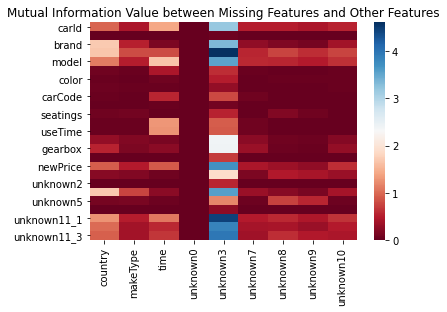

In [14]:
sns.heatmap(temp, cmap='RdBu')
plt.title('Mutual Information Value between Missing Features and Other Features')
plt.savefig('./solve1/corr1.png', dpi=1600, bbox_inches = 'tight')

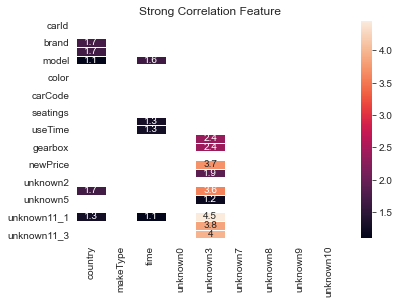

In [15]:
mask = np.zeros_like(temp[temp>1],dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
# 显示强相关模式的相关系数热力值，低于参考值的部分显示为白色，从而获取强相关项
# 得到互信息值的热力图
sns.heatmap(temp[temp>=1],annot=True,mask=mask,cbar=True, linewidths=.5)
plt.title('Strong Correlation Feature')
plt.savefig('./solve1/corr2.png', dpi=1600, bbox_inches = 'tight')

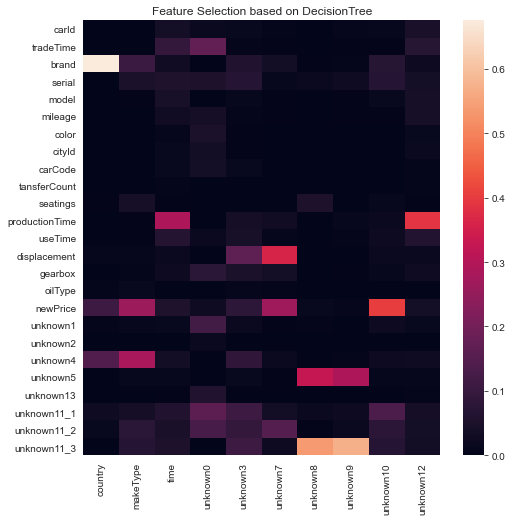

In [16]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# 基于决策树的特征选择

importance = pd.DataFrame(index=features, columns=missing.index)
score = []
for col in missing.index:
    _ = data[data[col].notna()]
    X = _[features]
    y = _[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dt = DecisionTreeClassifier(random_state=42)
    try:
        dt.fit(X_train, y_train)
    except ValueError:
        y = y.astype(np.int)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    dt.fit(X_train, y_train)
    score.append(dt.score(X_test, y_test))
    importance[col] = dt.feature_importances_
    dt = None
    del _, X, y, X_train, X_test, y_train, y_test, dt

_ = importance.T
_['score'] = score
importance = _.T

plt.figure(figsize=(8, 8))
sns.heatmap(importance.iloc[:-1])
plt.title('Feature Selection based on DecisionTree')
plt.savefig('./solve1/DecisionTreeFeatureSelection.png', dpi=800)

In [17]:
data[missing.index]

,country,makeType,time,unknown0,unknown3,unknown7,unknown8,unknown9,unknown10,unknown12
0,779413.0,1.0,4.0,1.0,1.0,1.0,5.0,2.0,1,3.824658
1,779415.0,2.0,4.0,1.0,2.0,2.0,4.0,3.0,1+2,4.816438
2,NaN,NaN,13.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN
3,779413.0,1.0,5.0,1.0,6.0,2.0,5.0,2.0,1,4.912329
4,779415.0,2.0,9.0,1.0,7.0,1.0,5.0,2.0,1,9.252055
...,...,...,...,...,...,...,...,...,...,...
29995,779413.0,1.0,15.0,1.0,621.0,1.0,5.0,2.0,1,NaN
29996,779415.0,2.0,9.0,1.0,155.0,1.0,4.0,3.0,1+2,8.427397
29997,779415.0,2.0,12.0,1.0,68.0,1.0,4.0,3.0,1,11.498630
29998,779415.0,3.0,6.0,1.0,529.0,1.0,4.0,3.0,3+2,5.279452


In [18]:
# 基于模型的缺失值处理，利用树模型对缺失值进行预测，以准确率和F1值综合评判模型效果
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import train_test_split

feature = [i for i in data.columns if i not in missing.index]
acc = pd.DataFrame(index=missing.index, columns=['accuracy', 'score'])

score = []
f1 = []

for col in missing.index:
    dt = DecisionTreeClassifier(random_state=42)
    if col in ['time', 'unknown12']:
        dt = DecisionTreeRegressor(random_state=42)
    temp = data[data[col].notna()]
    X = temp[feature]
    y = temp[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    try:
        dt.fit(X_train, y_train)
    except ValueError:
        y = y.astype(np.int)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    dt.fit(X_train, y_train)
    score.append(dt.score(X_test, y_test))
    predict = dt.predict(X_test)
    if type(dt) is DecisionTreeRegressor:
        f1.append(r2_score(y_test, predict))
        continue
    f1.append(f1_score(y_test, predict, average='weighted'))

acc['accuracy'] = score
acc['score'] = f1
acc

,accuracy,score
country,0.994918,0.994923
makeType,0.987604,0.987609
time,0.917752,0.917752
unknown0,0.998240,0.998155
unknown3,0.912971,0.908085
unknown7,0.974323,0.974195
unknown8,0.989714,0.989680
unknown9,0.982880,0.982880
unknown10,0.969410,0.969311
unknown12,0.918220,0.918220


In [19]:
# 准确率和F1均大于90%的使用该模型进行填充预测
acc = acc[acc>.9].dropna(axis=0)
acc = acc.sort_values(by='accuracy', ascending=False)
acc

,accuracy,score
unknown0,0.998240,0.998155
country,0.994918,0.994923
unknown8,0.989714,0.989680
makeType,0.987604,0.987609
unknown9,0.982880,0.982880
unknown7,0.974323,0.974195
unknown10,0.969410,0.969311
unknown12,0.918220,0.918220
time,0.917752,0.917752
unknown3,0.912971,0.908085


In [20]:
from pickle import dump
import category_encoders as ce

cols = []
for col in acc.index:
    missing = (data.shape[0] - data.count()) / data.shape[0]
    missing = missing[missing > 0.]
    dt = DecisionTreeClassifier(random_state=42)

    if col in ['time', 'unknown12']:
        dt = DecisionTreeRegressor(random_state=42)

    temp = data[data[col].notna()]
    nan = data[data[col].isna()]

    X = temp[[i for i in temp.columns if i not in missing.index and i != 'price']]
    y = temp[col]
    X_ = nan[[i for i in temp.columns if i not in missing.index and i != 'price']]
    cols.append(X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    try:
        dt.fit(X_train, y_train)
    except ValueError:
        y = y.astype(np.int)
        dt.fit(X_train, y_train)

    print(col, dt.score(X_test, y_test))
    try:
        y_pre = dt.predict(X_)
        data.loc[data[col].isnull(), col] = y_pre
    except ValueError:
        pass

    PATH = "../models/" + str(col) + "-" + str(dt) + '.pk'
    with open(PATH, 'wb') as f:
        dump(dt, f)

    if col == 'unknown10':
        encoder = ce.TargetEncoder(cols=['unknown10'], return_df=True).fit(data['unknown10'], data['price'])
        data['unknown10'] = encoder.transform(data['unknown10'])
        with open('./encoder.pk', 'wb') as f:
            dump(encoder, f)

with open('./dict.pk', 'wb') as f:
    dump(cols, f)



unknown0 0.9983573858969846
country 0.9942828103163511
unknown8 0.9892063492063492
makeType 0.994181634201872
unknown9 0.986949200112265
unknown7 0.9763569340282191
unknown10 0.9777627271701095
unknown12 0.9211279642813262
time 0.9727028841699944
unknown3 0.9193067461796497


In [21]:
# from pandas_profiling import ProfileReport
#
# pr = ProfileReport(data)
# pr.to_file('./solve1/report.html')

In [22]:
data

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown7,unknown8,unknown9,unknown10,unknown12,unknown13,price,unknown11_1,unknown11_2,unknown11_3
0,1,0.509589,1,1,1,4.01,1,1,1.0,0,...,1.0,5.0,2.0,5.964053,3.824658,1,4.24,4.220,1.740,1.625
1,2,0.517808,2,2,2,8.60,1,2,1.0,0,...,2.0,4.0,3.0,19.289185,4.816438,2,7.38,4.630,1.775,1.480
2,5,0.534247,5,5,5,15.56,1,2,3.0,0,...,1.0,4.0,3.0,5.964053,14.254795,2,1.00,4.515,1.725,1.445
3,6,0.506849,6,6,6,6.04,1,3,1.0,3,...,2.0,5.0,2.0,5.964053,4.912329,2,4.38,4.500,1.834,1.707
4,7,0.504110,7,7,7,5.70,4,1,2.0,2,...,1.0,5.0,2.0,5.964053,9.252055,1,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,0.600000,34,588,4169,10.38,5,35,3.0,0,...,1.0,5.0,2.0,5.964053,11.501370,1,0.88,4.295,1.705,1.570
29996,4294,1.578082,12,92,1797,11.69,2,1,2.0,2,...,1.0,4.0,3.0,19.289185,8.427397,2,8.30,4.960,1.845,1.480
29997,20584,1.260274,7,113,501,9.87,6,1,2.0,0,...,1.0,4.0,3.0,5.964053,11.498630,2,5.00,4.665,1.700,1.510
29998,11490,1.142466,45,131,3024,9.57,1,1,1.0,1,...,1.0,4.0,3.0,32.925907,5.279452,1,28.00,4.915,1.820,1.450


In [23]:
data['country'].unique()

array([779413., 779415., 779416., 779412., 779419., 779414., 779417.,
       779421., 779411., 779418.,      0.])

<AxesSubplot:xlabel='country', ylabel='count'>

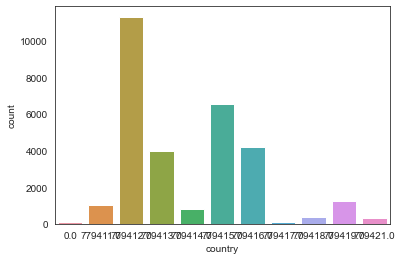

In [24]:
sns.countplot(data['country'])

In [25]:
data[data['country'] == 0][['brand', 'serial']].value_counts()

brand  serial
68     271       77
       733        6
       827        6
72     578        1
dtype: int64

In [26]:
data[data['brand']==68][['country', 'serial']].value_counts()

country   serial
0.0       271       77
          733        6
          827        6
779413.0  271        2
dtype: int64

In [27]:
data[data['brand']==72][['country', 'serial']].value_counts()

country   serial
779413.0  286       9
          567       4
          952       3
0.0       578       1
779413.0  578       1
          782       1
dtype: int64

In [28]:
data['country'].replace(0, 779413, inplace=True)


In [29]:
think = data[data['price'] > data['newPrice']][['price', 'newPrice']]
think['point'] = think['newPrice'] - think['price']
_ = think[(think['point'] / think['newPrice']).abs() > .3]
_

,price,newPrice,point
624,74.0000,49.00,-25.0000
2647,108.0000,77.20,-30.8000
3448,16.6800,12.65,-4.0300
7074,24.8000,10.98,-13.8200
7793,658.0000,16.78,-641.2200
8761,23.5000,17.88,-5.6200
9215,24.0000,7.68,-16.3200
10491,33.2800,8.58,-24.7000
10675,65.8000,49.00,-16.8000
12847,114.8800,80.50,-34.3800


In [30]:
data.drop(index=_.index, axis=0, inplace=True)
csv = data.copy()
csv['tradeTime'] = tradeTime

data.to_csv('./all.csv')

In [31]:
csv

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown7,unknown8,unknown9,unknown10,unknown12,unknown13,price,unknown11_1,unknown11_2,unknown11_3
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,...,1.0,5.0,2.0,5.964053,3.824658,1,4.24,4.220,1.740,1.625
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,2.0,4.0,3.0,19.289185,4.816438,2,7.38,4.630,1.775,1.480
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,...,1.0,4.0,3.0,5.964053,14.254795,2,1.00,4.515,1.725,1.445
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,2.0,5.0,2.0,5.964053,4.912329,2,4.38,4.500,1.834,1.707
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,1.0,5.0,2.0,5.964053,9.252055,1,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,1.0,5.0,2.0,5.964053,11.501370,1,0.88,4.295,1.705,1.570
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,1.0,4.0,3.0,19.289185,8.427397,2,8.30,4.960,1.845,1.480
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,1.0,4.0,3.0,5.964053,11.498630,2,5.00,4.665,1.700,1.510
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,1.0,4.0,3.0,32.925907,5.279452,1,28.00,4.915,1.820,1.450


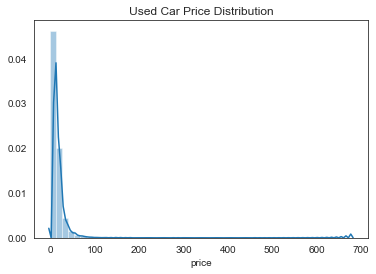

In [32]:
sns.distplot(data['price'])
plt.title('Used Car Price Distribution')
plt.savefig('./solve1/price_true.png', dpi=800)

In [33]:
number = ['tradeTime', 'mileage', 'productionTime', 'useTime', 'newPrice', 'unknown12', 'unknown11_1',
          'unknown11_2', 'unknown11_3']
classif = ['cityId', 'brand', 'serial', 'model', 'gearbox', 'displacement', 'unknown1', 'unknown3', 'unknown4',
         'color', 'tansferCount', 'makeType', 'unknown5', 'unknown7', 'unknown8',
           'unknown9', 'unknown13', 'seatings', 'country']
carId = data['carId']
data.drop(['oilType', 'unknown0', 'unknown2', 'carCode'], axis=1, inplace=True)

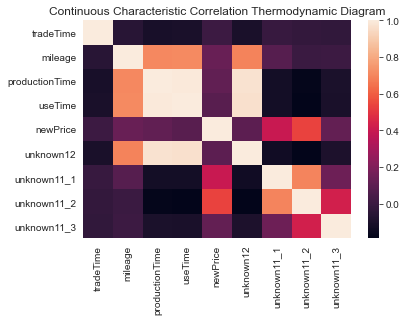

In [34]:
corr = data[number].corr()
sns.heatmap(corr)
plt.title('Continuous Characteristic Correlation Thermodynamic Diagram')
plt.savefig('./solve1/corr3.png', dpi=1600, bbox_inches = 'tight')

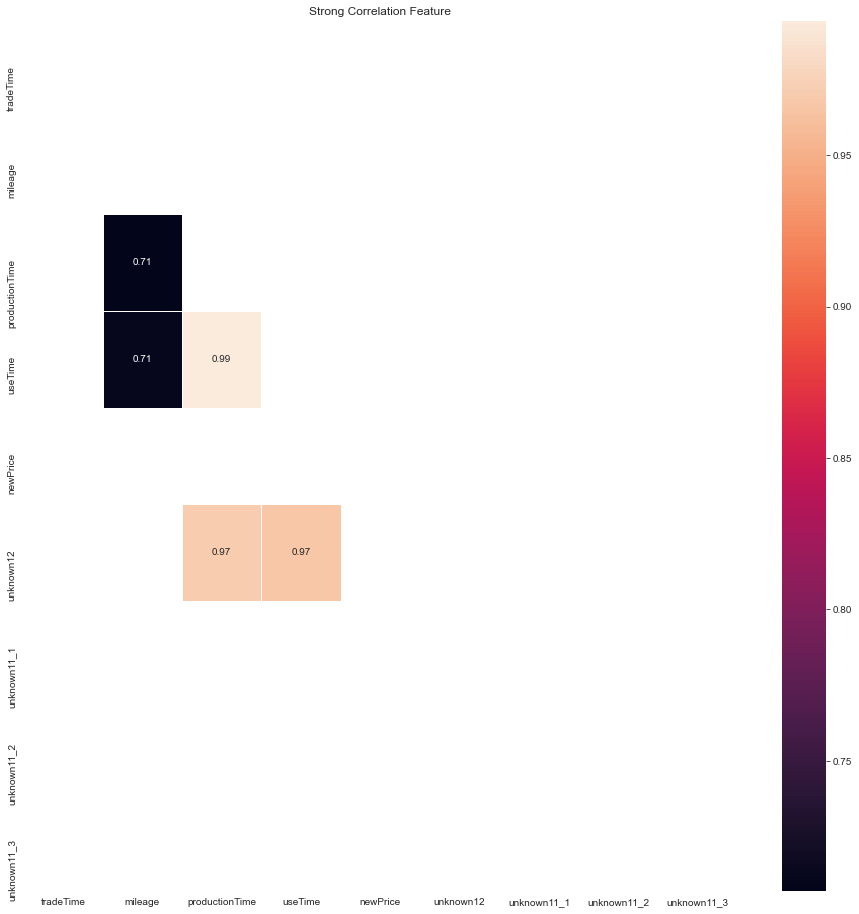

In [35]:
plt.figure(figsize=(16, 16))
mask = np.zeros_like(corr[corr>=.7],dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
# 显示强相关模式的相关系数热力值，低于参考值的部分显示为白色，从而获取强相关项
# 得到互信息值的热力图
sns.heatmap(corr[corr>=.7],annot=True,mask=mask,cbar=True, linewidths=.5)
plt.title('Strong Correlation Feature')
plt.savefig('./solve1/Strong Correlation Feature.png', dpi=1600, bbox_inches = 'tight')

In [36]:
drop = []

for index in corr.index:
    for col in corr.columns:
        if corr.loc[index, col] > 0.7 and index != col and (index, col) not in drop:
            drop.append((index, col))
print(drop)
drop = np.unique([col for col in drop])
drop

[('mileage', 'productionTime'), ('mileage', 'useTime'), ('productionTime', 'mileage'), ('productionTime', 'useTime'), ('productionTime', 'unknown12'), ('useTime', 'mileage'), ('useTime', 'productionTime'), ('useTime', 'unknown12'), ('unknown12', 'productionTime'), ('unknown12', 'useTime')]


array(['mileage', 'productionTime', 'unknown12', 'useTime'], dtype='<U14')

In [37]:
data.drop(['productionTime', 'unknown12', 'useTime'], axis=1, inplace=True)


In [38]:
encode = data.copy()

In [39]:
encoder = ce.TargetEncoder(cols=classif, return_df=True).fit(data[classif], data['price'])
data_encoder = encoder.transform(data[classif], data['price'])

with open('./encoder_2.pk', 'wb') as f:
    dump(encoder, f)

data_encoder

,cityId,brand,serial,model,gearbox,displacement,unknown1,unknown3,unknown4,color,tansferCount,makeType,unknown5,unknown7,unknown8,unknown9,unknown13,seatings,country
0,17.388693,4.374943,4.560278,4.645197,3.802913,8.115269,6.555371,4.737572,4.434371,13.676086,13.657052,6.616649,16.808603,9.613303,14.743833,14.945621,14.621999,13.250811,6.317522
1,8.711682,15.442870,7.637164,9.238201,14.683068,9.741985,7.196092,9.146947,14.272621,13.676086,13.657052,12.534627,13.283662,16.675436,13.333862,13.748810,13.927286,13.250811,12.598153
2,8.711682,10.575471,2.987080,1.478381,5.753174,7.150642,7.196092,2.068442,10.551381,13.676086,13.657052,12.534627,13.283662,9.613303,13.333862,13.748810,13.927286,13.250811,10.903341
3,13.583153,5.813369,6.048334,5.905335,14.683068,6.695356,10.514756,5.739305,5.745362,13.676086,16.868423,6.616649,16.808603,16.675436,14.743833,14.945621,13.927286,13.250811,6.317522
4,17.388693,9.433572,8.236782,7.001339,8.041409,17.753230,10.514756,7.011471,8.412363,10.811612,15.137601,12.534627,16.808603,9.613303,14.743833,14.945621,14.621999,13.250811,12.598153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13.559074,2.883953,1.936318,14.347985,3.143158,9.675468,6.115286,14.347985,2.404643,10.654346,13.657052,6.616649,16.011837,9.613303,14.743833,14.945621,14.621999,13.250811,6.317522
29996,17.388693,11.399387,12.364790,8.535283,8.740507,17.753230,13.572572,10.820525,11.134994,19.351054,15.137601,12.534627,13.283662,9.613303,13.333862,13.748810,13.927286,13.250811,12.598153
29997,17.388693,9.433572,7.322510,4.479977,5.753174,7.150642,7.196092,5.120918,8.412363,13.656029,13.657052,12.534627,13.283662,9.613303,13.333862,13.748810,13.927286,13.250811,12.598153
29998,17.388693,25.885233,22.926231,28.410856,17.627313,15.831761,23.903110,25.837245,25.885233,13.676086,15.319610,26.331941,13.283662,9.613303,13.333862,13.748810,14.621999,13.250811,12.598153


In [40]:
data[classif] = data_encoder
csv = data.copy()
csv['carId'] = carId
csv.to_csv('./data1.csv')
# from sklearn.feature_selection import RFE
# from xgboost.sklearn import XGBRegressor
#
# data = pd.get_dummies(columns=['carCode', 'color', 'tansferCount', 'makeType', 'unknown5', 'unknown7', 'unknown8',
#                                'unknown9', 'unknown13', 'seatings', 'country'], data=data)
#
# rfe_model = RFE(XGBRegressor(), n_features_to_select=1, step=1)
# rfe_model.fit(data[[col for col in data.columns if col != 'price']], data['price'])
# sorted(zip(map(lambda x: round(x, 4), rfe_model.ranking_), data.columns[:-1]))

In [41]:
def ape(model, train, target):
    predict = model.predict(train)
    loss = np.abs(target - predict)
    print('ape: ', str(loss / target))
    return loss / target

def mape(model, train, target):
    ap = ape(model, train, target)
    shape = ap.shape[0]
    print('mape: ', str(np.sum(ap) / shape))
    return np.sum(ap) / shape

def accuracy5(model, train, target):
    a = ape(model, train, target)
    total = a.shape[0]
    ape5 = a[a<=.05].shape[0]
    print('acc5: ', str(ape5 / total))
    return ape5 / total

def metrics(model, train, target):
    m = mape(model, train, target)
    accuracy = accuracy5(model, train, target)
    return 0.2*(1-m) + 0.8*accuracy

In [42]:
# input_num = Input(shape=(9,), name='num_input1')
# input_class = Input(shape=(31,), name='class_input1')
# input_num_ = Input(shape=(9,), name='num_input2')
# input_class_ = Input(shape=(31,), name='class_input2')
#
# x1 = Dense(128, activation='relu', name='level_1')(input_num)
# x11 = Dropout(0.8)(x1)
# x2 = Dense(128, activation='sigmoid', name='level_2')(input_class_)
# x21 = Dropout(0.8)(x2)
# x3 = Dense(128, activation='relu', name='regression_1')(input_num_)
# x31 = Dropout(0.8)(x3)
# x4 = Dense(128, activation='sigmoid', name='regression_2')(input_class)
# x41 = Dropout(0.8)(x4)
#
# x12 = Dense(32, activation='relu', name='level_11')(x11)
# x13 = Dropout(0.75)(x12)
# x22 = Dense(32, activation='sigmoid', name='level_21')(x21)
# x23 = Dropout(.75)(x22)
# x32 = Dense(32, activation='relu', name='regression_11')(x31)
# x33 = Dropout(.75)(x32)
# x42 = Dense(32, activation='sigmoid', name='regression_21')(x41)
# x43 = Dropout(.75)(x42)
#
# X1 = concatenate([x13, x23])
# X2 = concatenate([x33, x43])
#
# X11 = Dense(128, activation='relu', name='level_concat')(X1)
# X11 = Dropout(.8)(X11)
# y1 = Dense(100, activation='softmax', name='level')(X11)
# X21 = Dense(64, activation='relu', name='regression_concat')(X2)
#
# X3 = concatenate([x21, y1])
# X31 = Dense(64, activation='relu', name='concat')(X3)
# X32 = Dropout(.9)(X31)
# y2 = Dense(1, name='target')(X32)

In [43]:
# model = Model([input_num, input_class, input_num_, input_class_], [y1, y2])

In [44]:
# model.summary()

In [45]:
# model.compile(optimizer='adam', loss='mse', metrics='mape')
# history = model.fit(x={
#     'num_input1': X_train_number,
#     'class_input1': X_train_classif,
#     'num_input2': X_train_number,
#     'class_input2': X_train_classif,
# }, y={
#     'target': y['price'],
#     'level': y['level']
# },
# epochs=64,
# validation_split=.3,
# batch_size=2048)

In [46]:
# plt.plot(history.history['target_loss'])

In [47]:
# from sklearn.metrics import r2_score
#
# r2_score(y_test['price'], model.predict([X_test_number, X_test_classif, X_test_number, X_test_classif])[1])

In [48]:
# pre = model.predict([X_test_number, X_test_classif, X_test_number, X_test_classif])
# pre[1]

In [49]:
# plt.plot(range(len(pre[1])), pre[1], 'r')
# plt.plot(range(len(pre[1])), y_test['price'], 'b')

<AxesSubplot:>

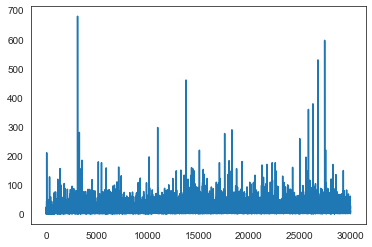

In [50]:
data['price'].plot()

10.222460887617034 273.9223100680952


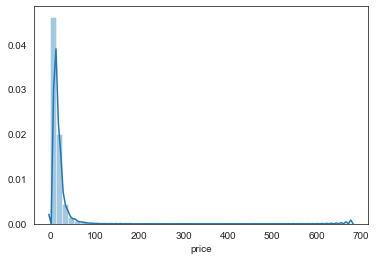

In [51]:
sns.distplot(data['price'])
print(data['price'].skew(), data['price'].kurt())
plt.savefig('./solve1/true.png', dpi=800)

$ln(1+n)$

0.14462289610805185 0.23273289154885024


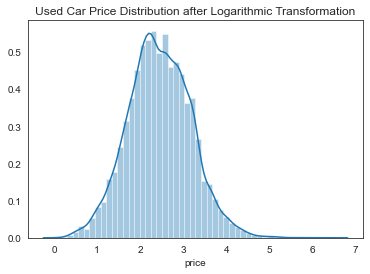

In [52]:
price = np.log1p(data['price'])
sns.distplot(price)
print(price.skew(), price.kurt())
plt.title('Used Car Price Distribution after Logarithmic Transformation')
plt.savefig('./solve1/log(1+n).png', dpi=800)

In [53]:
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
data.drop('carId', axis=1, inplace=True)
lr = LinearRegression()

X = data[[i for i in data.columns if i not in ['price', 'level']]]
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=.3, random_state=42)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8940314107887111

In [54]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
xgr.score(X_test, y_test)

0.9760186714657819

In [55]:
# from sklearn.preprocessing import MinMaxScaler
#
# data[number] = MinMaxScaler().fit_transform(data[number])
# for col in classif:
#     data[col] = (data[col].max() - data[col]) / (data[col].max() - data[col].min())
# data

In [56]:
number

['tradeTime',
 'mileage',
 'productionTime',
 'useTime',
 'newPrice',
 'unknown12',
 'unknown11_1',
 'unknown11_2',
 'unknown11_3']

In [57]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import bartlett

kmo = calculate_kmo(data)
bart = calculate_bartlett_sphericity(data)

kmo

(array([0.39803425, 0.8466947 , 0.9484239 , 0.93367334, 0.62752086,
        0.96238319, 0.88348725, 0.91122598, 0.83499735, 0.89677894,
        0.87726475, 0.63542163, 0.95797518, 0.95579841, 0.92955882,
        0.94088646, 0.96936762, 0.85629571, 0.78445104, 0.96486168,
        0.65827679, 0.5192785 , 0.94418134, 0.60877659, 0.93680366,
        0.82562947, 0.88597594, 0.59503347]),
 0.8919445283894127)

In [58]:
corr = np.corrcoef(data)
corr

array([[1.        , 0.51444542, 0.6400334 , ..., 0.80964369, 0.01133811,
        0.24568413],
       [0.51444542, 1.        , 0.56455158, ..., 0.5436425 , 0.51374731,
        0.63390524],
       [0.6400334 , 0.56455158, 1.        , ..., 0.87010823, 0.00716404,
        0.09539973],
       ...,
       [0.80964369, 0.5436425 , 0.87010823, ..., 1.        , 0.15757336,
        0.30008369],
       [0.01133811, 0.51374731, 0.00716404, ..., 0.15757336, 1.        ,
        0.83251817],
       [0.24568413, 0.63390524, 0.09539973, ..., 0.30008369, 0.83251817,
        1.        ]])

In [59]:
bartlett(corr[0], corr[1], corr[2], corr[3], corr[4])

BartlettResult(statistic=18406.141698933556, pvalue=0.0)

In [60]:
# from keras.layers import Dense
# from keras.models import Sequential
#
# model = Sequential()
# model.add(Dense(32, input_dim=40, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1))
#
# model.compile(optimizer='Adam', loss='mse')
# his = model.fit(X_train, y_train, epochs=16,  validation_split=.3)

In [61]:
X = data[[i for i in data.columns if i != 'price']]
y = price

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [63]:
# plt.plot(his.history['loss'], 'r', label='loss')
# plt.plot(his.history['val_loss'], 'b', label='val_loss')
# plt.legend()

In [64]:
# model.predict(X)

In [65]:
from lightgbm.sklearn import LGBMRegressor

gbm = LGBMRegressor()
gbm.fit(X_train.values, y_train)
gbm.score(X_test.values, y_test)

0.9750566423677095

In [66]:
X_train

,tradeTime,brand,serial,model,mileage,color,cityId,tansferCount,seatings,country,...,unknown4,unknown5,unknown7,unknown8,unknown9,unknown10,unknown13,unknown11_1,unknown11_2,unknown11_3
28955,1.131507,4.947638,6.575161,4.455271,5.59,10.811612,11.442602,13.657052,13.250811,6.317522,...,4.907359,16.808603,9.613303,14.743833,14.945621,5.964053,13.927286,4.650,1.850,1.705
18492,1.506849,22.498493,36.756922,14.347985,10.55,13.656029,17.388693,15.319610,13.250811,19.340521,...,25.404152,16.808603,16.675436,14.743833,14.945621,32.925907,13.927286,4.909,1.938,1.772
24007,0.767123,26.819378,19.066782,13.059143,4.92,10.654346,17.388693,13.657052,13.250811,19.340521,...,28.787321,13.283662,9.613303,13.333862,13.748810,32.925907,14.621999,4.872,1.854,1.470
23811,1.838356,5.785473,5.096872,5.022119,14.86,10.654346,8.137854,13.657052,18.678786,10.903341,...,12.162410,16.808603,9.613303,14.743833,14.945621,19.289185,13.927286,4.635,1.870,1.755
6814,1.317808,20.363187,16.598186,22.021192,3.09,13.676086,10.170900,13.657052,13.250811,19.340521,...,18.049490,13.283662,16.675436,13.333862,13.748810,19.289185,14.621999,4.818,1.843,1.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,0.536986,5.785473,5.096872,5.022119,15.74,16.314734,17.388693,15.319610,18.678786,10.903341,...,12.162410,16.808603,9.613303,14.743833,14.945621,19.289185,14.621999,4.635,1.870,1.755
5395,1.575342,14.195162,14.235786,9.380000,4.63,10.811612,17.388693,15.319610,25.898959,30.050507,...,14.136791,7.444239,9.613303,11.545118,14.945621,19.289185,14.621999,3.723,1.683,1.407
861,0.808219,10.575471,9.413723,3.633395,4.64,10.654346,8.155523,15.319610,13.250811,10.903341,...,10.551381,13.283662,9.613303,13.333862,13.748810,19.289185,13.927286,4.998,1.851,1.461
15814,0.517808,26.819378,28.435067,23.144545,9.23,13.676086,14.607828,13.657052,13.250811,19.340521,...,23.318323,13.283662,16.675436,13.333862,13.748810,32.925907,14.621999,5.024,1.854,1.477


In [67]:
y_train

28955    1.663926
18492    3.657905
24007    2.833213
23811    1.609438
6814     3.151881
           ...   
29836    1.458615
5395     2.066863
861      0.916291
15814    3.182212
23685    1.663926
Name: price, Length: 20976, dtype: float64

In [68]:
def Ape(y_predict, y):
    return np.abs(y_predict - y) / y

def Mape(y_predict, y):
    return Ape(y_predict, y).mean()

def Acc5(y_predict, y):
    ape = Ape(y_predict, y)
    ape = ape[ape < .05]
    return ape.shape[0] / y.shape[0]

def met(y_predict, y):
    return .2 * (1 - Mape(y_predict, y)) + .8 * Acc5(y_predict, y)

def true(price_ln):
    return np.e ** price_ln - 1

In [69]:
pre = xgr.predict(X_test)
pre = true(pre)
y_true= true(y_test)
met(pre, y_true)

0.5182635053851539

In [70]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

cross_val_score(xgr, X, price, cv=5, scoring=make_scorer(met))

array([0.77098485, 0.80275238, 0.83481325, 0.83495837, 0.830979  ])

In [71]:
Acc5(pre, y_true)

0.43103448275862066

In [72]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor

models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    XGBRegressor(tree_method='gpu_hist', gpu_id=0, n_estimators=500, eta=.1),
    LGBMRegressor(),
    CatBoostRegressor(iterations=300 ,task_type='GPU')
]

In [73]:
result = dict()

for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(met))
    result[model_name] = scores

result = pd.DataFrame(result)

Learning rate set to 0.125664
0:	learn: 0.6420962	total: 11.8ms	remaining: 3.53s
1:	learn: 0.5767121	total: 15.8ms	remaining: 2.36s
2:	learn: 0.5199515	total: 19.6ms	remaining: 1.94s
3:	learn: 0.4706748	total: 23.1ms	remaining: 1.71s
4:	learn: 0.4262429	total: 27ms	remaining: 1.59s
5:	learn: 0.3885017	total: 31.3ms	remaining: 1.53s
6:	learn: 0.3550508	total: 34.9ms	remaining: 1.46s
7:	learn: 0.3263840	total: 38.9ms	remaining: 1.42s
8:	learn: 0.3002976	total: 42.6ms	remaining: 1.38s
9:	learn: 0.2782988	total: 46.5ms	remaining: 1.35s
10:	learn: 0.2586139	total: 50.4ms	remaining: 1.32s
11:	learn: 0.2417053	total: 54.1ms	remaining: 1.3s
12:	learn: 0.2280155	total: 57.8ms	remaining: 1.27s
13:	learn: 0.2154568	total: 61.5ms	remaining: 1.25s
14:	learn: 0.2042071	total: 65.4ms	remaining: 1.24s
15:	learn: 0.1953082	total: 69.1ms	remaining: 1.23s
16:	learn: 0.1871008	total: 73ms	remaining: 1.21s
17:	learn: 0.1799876	total: 76.7ms	remaining: 1.2s
18:	learn: 0.1736586	total: 80.6ms	remaining: 1.19

In [74]:
result

,LinearRegression,Lasso,Ridge,DecisionTreeRegressor,GradientBoostingRegressor,RandomForestRegressor,XGBRegressor,LGBMRegressor,<catboost.core.CatBoostRegressor object at 0x00000278A9997250>
0,0.514718,0.384730,0.515247,0.679773,0.711089,0.766866,0.789291,0.768962,0.769678
1,0.503094,0.380187,0.503225,0.714303,0.743474,0.803381,0.819403,0.797074,0.802983
2,0.535575,0.398378,0.535708,0.748408,0.775555,0.838379,0.851211,0.830899,0.834282
3,0.526123,0.391698,0.526125,0.757348,0.767113,0.839958,0.851251,0.827714,0.829178
4,0.541139,0.397950,0.541406,0.759119,0.776741,0.834443,0.845493,0.824105,0.834445


In [75]:
best_model = CatBoostRegressor()
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

Learning rate set to 0.066223
0:	learn: 0.6896262	total: 12.7ms	remaining: 12.7s
1:	learn: 0.6543102	total: 19.8ms	remaining: 9.9s
2:	learn: 0.6195717	total: 25.8ms	remaining: 8.59s
3:	learn: 0.5874725	total: 31ms	remaining: 7.71s
4:	learn: 0.5576702	total: 36ms	remaining: 7.16s
5:	learn: 0.5294995	total: 41ms	remaining: 6.8s
6:	learn: 0.5025479	total: 46.2ms	remaining: 6.56s
7:	learn: 0.4787387	total: 51.5ms	remaining: 6.39s
8:	learn: 0.4565740	total: 57ms	remaining: 6.28s
9:	learn: 0.4351879	total: 63.2ms	remaining: 6.26s
10:	learn: 0.4154506	total: 69.1ms	remaining: 6.21s
11:	learn: 0.3973817	total: 74ms	remaining: 6.09s
12:	learn: 0.3803816	total: 79.4ms	remaining: 6.03s
13:	learn: 0.3640460	total: 84.8ms	remaining: 5.97s
14:	learn: 0.3483571	total: 90.5ms	remaining: 5.94s
15:	learn: 0.3342540	total: 95.9ms	remaining: 5.89s
16:	learn: 0.3208002	total: 103ms	remaining: 5.93s
17:	learn: 0.3079690	total: 108ms	remaining: 5.89s
18:	learn: 0.2962107	total: 114ms	remaining: 5.86s
19:	lea

0.979305196618897

In [76]:
# from sklearn.model_selection import GridSearchCV
#
# params = {
# 'iterations': [500, 1000],
# 'learning_rate':  [0.01, 0.05, 0.1],
# 'max_depth': [5, 10],
# 'l2_leaf_reg': [1, 3],
# 'task_type': ['GPU']
# }
#
# clf = GridSearchCV(CatBoostRegressor(), param_grid=params, cv=3, scoring=make_scorer(met))
# clf.fit(X_train, y_train)

In [77]:
# print(clf.best_score_, clf.best_params_)

In [78]:
# cross_val_score(CatBoostRegressor(iterations=1000, l2_leaf_reg=3, learning_rate=.1, max_depth=10,
#                                   task_type='GPU'), X_train, y_train, cv=5, scoring=make_scorer(met))

In [79]:
model = CatBoostRegressor(task_type='GPU')
model.fit(X_train, y_train,eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.08627
0:	learn: 0.6765520	test: 0.6765400	best: 0.6765400 (0)	total: 23ms	remaining: 23s
1:	learn: 0.6287044	test: 0.6286701	best: 0.6286701 (1)	total: 43.5ms	remaining: 21.7s
2:	learn: 0.5862822	test: 0.5864561	best: 0.5864561 (2)	total: 65.8ms	remaining: 21.9s
3:	learn: 0.5467591	test: 0.5471776	best: 0.5471776 (3)	total: 85.5ms	remaining: 21.3s
4:	learn: 0.5111968	test: 0.5112894	best: 0.5112894 (4)	total: 105ms	remaining: 20.8s
5:	learn: 0.4775846	test: 0.4777596	best: 0.4777596 (5)	total: 124ms	remaining: 20.5s
6:	learn: 0.4467503	test: 0.4469982	best: 0.4469982 (6)	total: 143ms	remaining: 20.3s
7:	learn: 0.4192725	test: 0.4197692	best: 0.4197692 (7)	total: 161ms	remaining: 20s
8:	learn: 0.3942792	test: 0.3947172	best: 0.3947172 (8)	total: 179ms	remaining: 19.7s
9:	learn: 0.3711061	test: 0.3715847	best: 0.3715847 (9)	total: 196ms	remaining: 19.4s
10:	learn: 0.3504732	test: 0.3508458	best: 0.3508458 (10)	total: 214ms	remaining: 19.2s
11:	learn: 0.3319353	test

In [80]:
fea = model.feature_importances_.tolist()
fea_name = model.feature_names_

In [81]:
for name, value in zip(fea_name, fea):
    print(name, value)

tradeTime 0.2055395848344024
brand 0.8318716688739385
serial 29.77944975448222
model 19.450052802811076
mileage 2.932563723727699
color 0.039048824957876725
cityId 0.3476012402888212
tansferCount 0.0076577281920002845
seatings 0.11060240992041076
country 0.7897856960511132
makeType 0.9755970409141914
time 14.902442514510623
displacement 0.3064596029637892
gearbox 7.055240699757853
newPrice 9.429632662566958
unknown1 0.7091663223305642
unknown3 10.771621799925652
unknown4 0.6588465161011513
unknown5 0.0193365833957125
unknown7 0.0030962400819908083
unknown8 0.0053519428704250065
unknown9 0.0012138818346630476
unknown10 0.04249940113683281
unknown13 0.006672195717410605
unknown11_1 0.15647634839558477
unknown11_2 0.19006470221071856
unknown11_3 0.2721081111463357


In [82]:
model.score(X_test, y_test)

0.9755032669261963

In [83]:
y_pre = true(model.predict(X))
met(y_pre, data['price'])

0.5054356904174702

In [84]:
met(model.predict(X), price)

0.8152839269935761

In [85]:
Acc5(model.predict(X), price)

0.7791830741507041

In [86]:
Mape(model.predict(X), price)

0.04031266163493607

In [87]:
Acc5(y_pre, data['price'])

0.4075285323366482

In [88]:
Mape(y_pre, data['price'])

0.10293567725924237

In [89]:
gbm = LGBMRegressor()
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.9750566423677095

In [90]:
met(gbm.predict(X), price)

0.8311995668883582

In [91]:
with open('../models/catboost.pk', 'wb') as f:
    dump(model, f)

In [92]:
xgr = XGBRegressor(n_estimators=500, eta=.3)
xgr.fit(X_train, y_train)
pre = xgr.predict(X)

In [93]:
xgr.score(X_test, y_test)

0.9762301662688682

In [94]:
met(pre, price)

0.9410866941405859

In [95]:
predict = true(pre)
met(predict, data['price'])

0.7823731269216779

In [96]:
Acc5(predict, data['price'])

0.7423413201628513

In [97]:
Mape(predict, data['price'])

0.057499646043015655

In [98]:
with open('../models/xgboost.pk', 'wb') as f:
    dump(xgr, f)

In [99]:
data

,tradeTime,brand,serial,model,mileage,color,cityId,tansferCount,seatings,country,...,unknown5,unknown7,unknown8,unknown9,unknown10,unknown13,price,unknown11_1,unknown11_2,unknown11_3
0,0.509589,4.374943,4.560278,4.645197,4.01,13.676086,17.388693,13.657052,13.250811,6.317522,...,16.808603,9.613303,14.743833,14.945621,5.964053,14.621999,4.24,4.220,1.740,1.625
1,0.517808,15.442870,7.637164,9.238201,8.60,13.676086,8.711682,13.657052,13.250811,12.598153,...,13.283662,16.675436,13.333862,13.748810,19.289185,13.927286,7.38,4.630,1.775,1.480
2,0.534247,10.575471,2.987080,1.478381,15.56,13.676086,8.711682,13.657052,13.250811,10.903341,...,13.283662,9.613303,13.333862,13.748810,5.964053,13.927286,1.00,4.515,1.725,1.445
3,0.506849,5.813369,6.048334,5.905335,6.04,13.676086,13.583153,16.868423,13.250811,6.317522,...,16.808603,16.675436,14.743833,14.945621,5.964053,13.927286,4.38,4.500,1.834,1.707
4,0.504110,9.433572,8.236782,7.001339,5.70,10.811612,17.388693,15.137601,13.250811,12.598153,...,16.808603,9.613303,14.743833,14.945621,5.964053,14.621999,5.90,4.315,1.783,1.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.600000,2.883953,1.936318,14.347985,10.38,10.654346,13.559074,13.657052,13.250811,6.317522,...,16.011837,9.613303,14.743833,14.945621,5.964053,14.621999,0.88,4.295,1.705,1.570
29996,1.578082,11.399387,12.364790,8.535283,11.69,19.351054,17.388693,15.137601,13.250811,12.598153,...,13.283662,9.613303,13.333862,13.748810,19.289185,13.927286,8.30,4.960,1.845,1.480
29997,1.260274,9.433572,7.322510,4.479977,9.87,13.656029,17.388693,13.657052,13.250811,12.598153,...,13.283662,9.613303,13.333862,13.748810,5.964053,13.927286,5.00,4.665,1.700,1.510
29998,1.142466,25.885233,22.926231,28.410856,9.57,13.676086,17.388693,15.319610,13.250811,12.598153,...,13.283662,9.613303,13.333862,13.748810,32.925907,14.621999,28.00,4.915,1.820,1.450


In [100]:
from shap import TreeExplainer

explainer = TreeExplainer(xgr)
shape_values = explainer.shap_values(X)

In [101]:
shape_values2 = explainer(X)

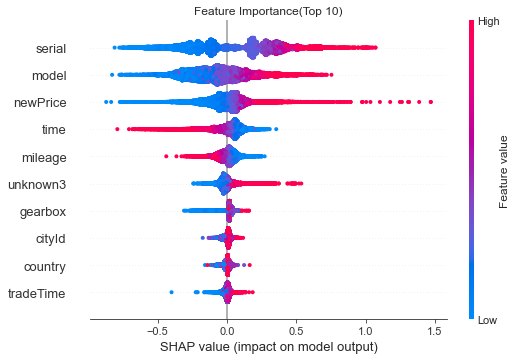

In [102]:
import shap
shap.summary_plot(shape_values, X, max_display=10, show=False)
plt.title('Feature Importance(Top 10)')
plt.savefig('./solve1/summary.png', dpi=1600, bbox_inches = 'tight')

<Figure size 576x360 with 0 Axes>

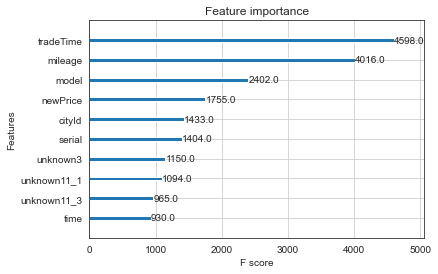

In [103]:
import xgboost as xgb

plt.figure(figsize=(8, 5))
xgb.plot_importance(xgr, max_num_features=10)
plt.savefig('./solve1/Feature F_Score.png', dpi=800, bbox_inches = 'tight')

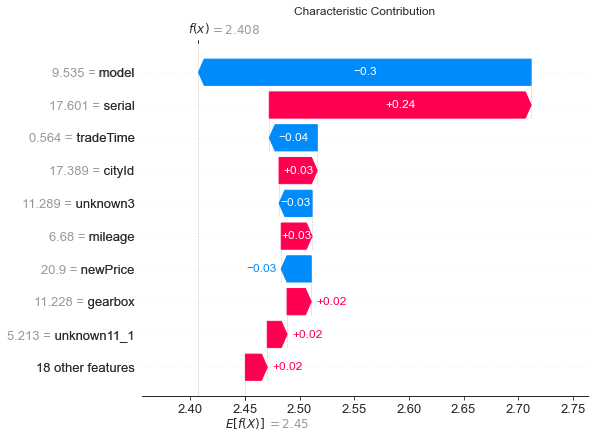

In [104]:
shap.plots.waterfall(shape_values2[19], show=False)
plt.title('Characteristic Contribution')
plt.savefig('./solve1/newPrice_waterfall.png', dpi=800, bbox_inches = 'tight')

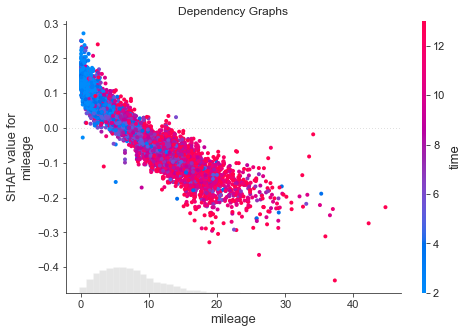

In [105]:
shape_values2.display_data = X.values
shap.plots.scatter(shape_values2[:, "mileage"],
                    color=shape_values2[:, "time"], show=False)
plt.title('Dependency Graphs')
plt.savefig('./solve1/scatter.png', dpi=800, bbox_inches = 'tight')

In [106]:
Acc5(xgr.predict(X), price)

0.9314890208903424

In [107]:
Mape(xgr.predict(X), price)

0.020522612858440575

In [108]:
xgr.score(X_test, y_test)

0.9762301662688682

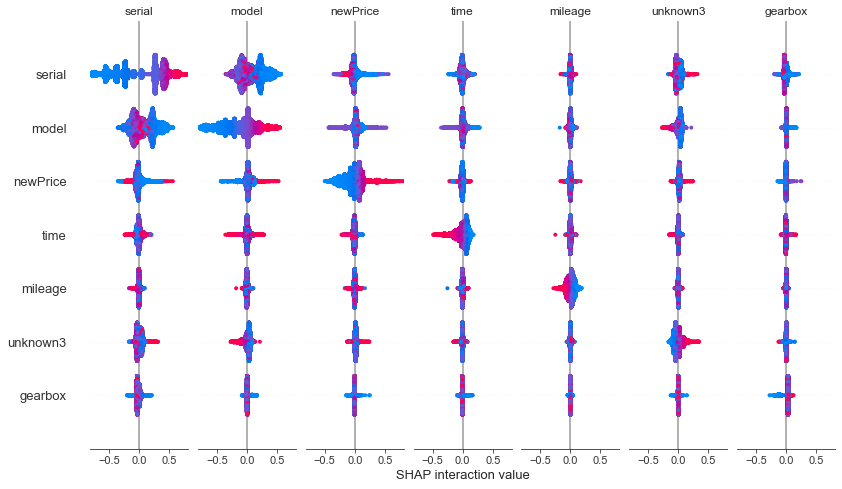

In [109]:
shape_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shape_interaction_values, X, show=False)
plt.savefig('./solve1/Important Feature Correlations.png', dpi=1600, bbox_inches = 'tight')

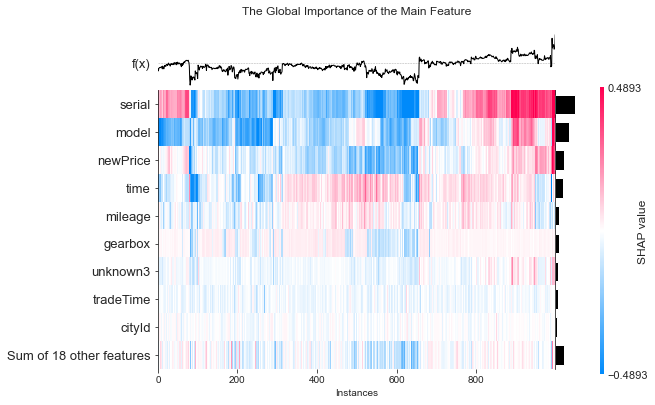

In [110]:
heatmap = explainer(X[:1000])
shap.plots.heatmap(heatmap, show=False)
plt.title('The Global Importance of the Main Feature')
plt.savefig('./solve1/The global importance of the main feature.png', dpi=800)

In [119]:
X_ = X[['serial', 'model', 'newPrice', 'time',  'mileage', 'gearbox', 'unknown3', 'tradeTime', 'cityId']]
y = price

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=.3, random_state=42)

In [120]:
xgr2 = XGBRegressor(tree_method='gpu_hist', gpu_id=0, n_estimators=500, eta=.1)
xgr2.fit(X_train.values, y_train)
xgr2.score(X_test.values, y_test)

0.9761325874090153

In [121]:
X_train

,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId
28955,6.575161,4.455271,11.88,7.0,5.59,5.400006,4.397342,1.131507,11.442602
18492,36.756922,14.347985,107.80,7.0,10.55,29.475870,41.669431,1.506849,17.388693
24007,19.066782,13.059143,66.80,12.0,4.92,24.899177,13.055360,0.767123,17.388693
23811,5.096872,5.022119,26.58,13.0,14.86,13.272153,4.756974,1.838356,8.137854
6814,16.598186,22.021192,30.70,3.0,3.09,16.881790,21.658265,1.317808,10.170900
...,...,...,...,...,...,...,...,...,...
29836,5.096872,5.022119,26.58,13.0,15.74,13.272153,4.756974,0.536986,17.388693
5395,14.235786,9.380000,26.90,10.0,4.63,11.228469,10.309999,1.575342,17.388693
861,9.413723,3.633395,23.98,15.0,4.64,4.017890,3.586244,0.808219,8.155523
15814,28.435067,23.144545,42.90,6.0,9.23,24.899177,30.551589,0.517808,14.607828


In [122]:
y_train

28955    1.663926
18492    3.657905
24007    2.833213
23811    1.609438
6814     3.151881
           ...   
29836    1.458615
5395     2.066863
861      0.916291
15814    3.182212
23685    1.663926
Name: price, Length: 20976, dtype: float64

In [123]:
pre = xgr2.predict(X_)
met(pre, price)

0.8911564274009565

In [124]:
predict = true(pre)
met(predict, data['price'])

0.6161512212473444

In [117]:
Mape(xgr.predict(X), price)

0.020522612858440575

In [118]:
Acc5(predict, data['price'])

0.552325969432023